In [1]:
import sys
import os

# Ajoute le dossier racine de ton projet (là où se trouve utils/)
sys.path.append(os.path.abspath(".."))  # adapte selon l’endroit où est ton notebook



import matplotlib.pyplot as plt
import pandas as pd 
from utils.paths import DATA_SALES_EVALUATION, DATA_SALES_VALIDATION, DATA_TRAIN_SET, DATA_TEST_SET
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

/Users/alexis/Downloads/Ponts/2A/DATABI/Projet/data/test_set.csv


In [30]:
df_evaluation = pd.read_csv(DATA_SALES_EVALUATION)
df_validation = pd.read_csv(DATA_SALES_VALIDATION)

In [33]:
df_evaluation.info()
df_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


id          HOBBIES_1_001_CA_1_evaluation
item_id                     HOBBIES_1_001
dept_id                         HOBBIES_1
cat_id                            HOBBIES
store_id                             CA_1
                        ...              
d_1937                                  0
d_1938                                  3
d_1939                                  3
d_1940                                  0
d_1941                                  1
Name: 0, Length: 1947, dtype: object


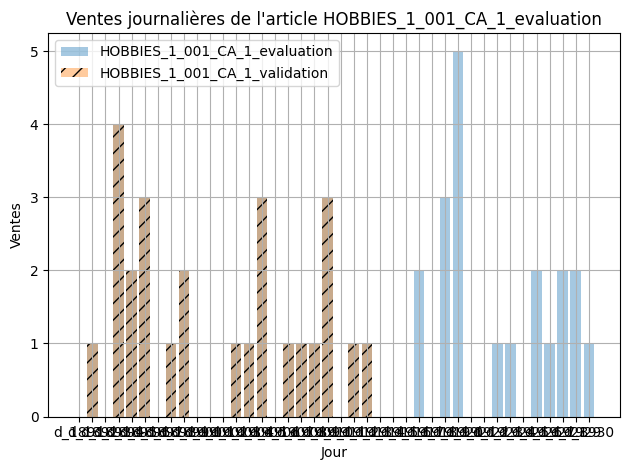

In [45]:
# Choisir une ligne (ex: la première)
row_evaluation = df_evaluation.iloc[0]
print(row_evaluation)
row_validation = df_validation.iloc[0]

# Extraire les colonnes correspondant aux jours
days_evaluation = row_evaluation.filter(like='d_').index
sales_evaluation = row_evaluation.filter(like='d_').values

days_validation = row_validation.filter(like='d_').index
sales_validation = row_evaluation.filter(like='d_').values


# Tracer la ligne

plt.bar(days_evaluation[1890:1930], sales_evaluation[1890:1930], label=row_evaluation['id'], alpha = 0.4)
plt.bar(days_validation[1890:1913], sales_validation[1890:1913], label=row_validation['id'], alpha = 0.4, hatch = '//')
plt.xlabel("Jour")
plt.ylabel("Ventes")
plt.title(f"Ventes journalières de l'article {row_evaluation['id']}")
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()

In [ ]:
X = pd.read_parquet(DATA_TRAIN_SET)
y = X['sales']
X.drop(y)

X_test = pd.read_parquet(DATA_TEST_SET)

xgb_model = XGBRegressor()

params_xgb = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [None, 3, 5, 7],
    'min_child_weight': [1, 5, 10],
    'reg_lambda': [0.0, 0.1, 1.0]
}

xgb = GridSearchCV(estimator  = xgb_model,
                param_grid = params_xgb,
                scoring    = 'neg_root_mean_squared_error',
                cv         = 5,
                n_jobs     = -1,
                verbose    = 1)
xgb.fit(X, y)



Fitting 5 folds for each of 108 candidates, totalling 540 fits


ValueError: 
All the 540 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alexis/Downloads/Ponts/2A/DATABI/Projet/projdatbi/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alexis/Downloads/Ponts/2A/DATABI/Projet/projdatbi/lib/python3.9/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/Users/alexis/Downloads/Ponts/2A/DATABI/Projet/projdatbi/lib/python3.9/site-packages/xgboost/sklearn.py", line 1143, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "/Users/alexis/Downloads/Ponts/2A/DATABI/Projet/projdatbi/lib/python3.9/site-packages/xgboost/sklearn.py", line 603, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
  File "/Users/alexis/Downloads/Ponts/2A/DATABI/Projet/projdatbi/lib/python3.9/site-packages/xgboost/sklearn.py", line 1065, in _create_dmatrix
    return QuantileDMatrix(
  File "/Users/alexis/Downloads/Ponts/2A/DATABI/Projet/projdatbi/lib/python3.9/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/Users/alexis/Downloads/Ponts/2A/DATABI/Projet/projdatbi/lib/python3.9/site-packages/xgboost/core.py", line 1573, in __init__
    self._init(
  File "/Users/alexis/Downloads/Ponts/2A/DATABI/Projet/projdatbi/lib/python3.9/site-packages/xgboost/core.py", line 1632, in _init
    it.reraise()
  File "/Users/alexis/Downloads/Ponts/2A/DATABI/Projet/projdatbi/lib/python3.9/site-packages/xgboost/core.py", line 569, in reraise
    raise exc  # pylint: disable=raising-bad-type
  File "/Users/alexis/Downloads/Ponts/2A/DATABI/Projet/projdatbi/lib/python3.9/site-packages/xgboost/core.py", line 550, in _handle_exception
    return fn()
  File "/Users/alexis/Downloads/Ponts/2A/DATABI/Projet/projdatbi/lib/python3.9/site-packages/xgboost/core.py", line 637, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
  File "/Users/alexis/Downloads/Ponts/2A/DATABI/Projet/projdatbi/lib/python3.9/site-packages/xgboost/data.py", line 1402, in next
    input_data(**self.kwargs)
  File "/Users/alexis/Downloads/Ponts/2A/DATABI/Projet/projdatbi/lib/python3.9/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/Users/alexis/Downloads/Ponts/2A/DATABI/Projet/projdatbi/lib/python3.9/site-packages/xgboost/core.py", line 617, in input_data
    new, cat_codes, feature_names, feature_types = _proxy_transform(
  File "/Users/alexis/Downloads/Ponts/2A/DATABI/Projet/projdatbi/lib/python3.9/site-packages/xgboost/data.py", line 1447, in _proxy_transform
    df, feature_names, feature_types = _transform_pandas_df(
  File "/Users/alexis/Downloads/Ponts/2A/DATABI/Projet/projdatbi/lib/python3.9/site-packages/xgboost/data.py", line 603, in _transform_pandas_df
    pandas_check_dtypes(data, enable_categorical)
  File "/Users/alexis/Downloads/Ponts/2A/DATABI/Projet/projdatbi/lib/python3.9/site-packages/xgboost/data.py", line 569, in pandas_check_dtypes
    _invalid_dataframe_dtype(data)
  File "/Users/alexis/Downloads/Ponts/2A/DATABI/Projet/projdatbi/lib/python3.9/site-packages/xgboost/data.py", line 356, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:id: object, item_id: object, dept_id: object, cat_id: object, store_id: object, state_id: object, d: object, date: object, weekday: object, event_name_1: object, event_type_1: object, event_name_2: object, event_type_2: object


In [ ]:
y_pred_xgb = xgb.predict(X_test)